In [1]:
import numpy as np
from matplotlib import pyplot as plt

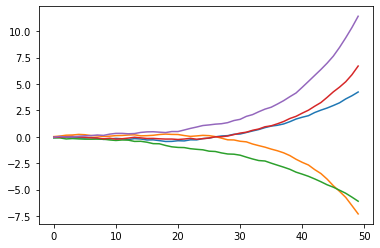

In [22]:
# generating simple linear dynamical system, x'(t) = x(t)M
n = 5
t = 50

X = np.zeros((t, n))
X[0, :] = np.random.uniform(-.1, .1, n) # setting x(0) randomly
M = np.random.uniform(-.1, .1, size=(n, n)) # random M - 
# M, _ = np.linalg.qr(M)

for i in range(1, t):
    X[i, :] = X[i-1, :] + ( X[i-1, :] @ M ) + np.random.uniform(-.1, .1, size=(1, n))
    
plt.plot(X)

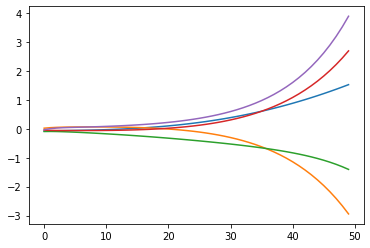

In [23]:
# fitting M with whole data least squares and comparing

X_dot = X[1:, :] - X[:-1, :]  # gets the first difference of X 
X = X[:-1, :]  # excluding last datapoint to match X_dot shape
M_star = np.linalg.inv(X.T @ X) @ X.T @ X_dot

# generating ts with our fit M_star
X_star = np.zeros((t, n))
X_star[0, :] = np.copy(X[0, :])
for i in range(1, t):
    X_star[i, :] = X_star[i-1, :] + ( X_star[i-1, :] @ M_star )
    
plt.plot(X_star)


In [24]:
# making sure woodbury update is real - checking if (X.T @ X)^-1 is calculated correctly
def woodbury_update(A_inv, U, C_inv, V):
    return A_inv - A_inv @ U.T @ np.linalg.inv((C_inv + V @ A_inv @ U.T)) @ V @ A_inv

n = 5
t = 6
t_prime = 2

X_0 = np.random.uniform(-1, 1, size=(t, n))
R = np.random.uniform(-1, 1, size=(t_prime, n))
X = np.append(X_0, R, axis=0)

X_inv = np.linalg.inv(X.T @ X)

X_0_inv = np.linalg.inv(X_0.T @ X_0)
A_inv = X_0_inv
U = np.copy(R)
C_inv = np.eye(R.shape[0])
V = np.copy(R)

X_inv_woodbury = woodbury_update(A_inv, U, C_inv, V)
print(np.allclose(X_inv, X_inv_woodbury))

# making sure woodbury least squares gets same answer as naive least squares and is faster




True


In [ ]:
# Ax = b or AX = B

def least_squares(A, b):
    return np.linalg.inv(A.T @ A) @ A.T @ b


# process k cols at a time
# init with k_init cols
def inc_lstsq_simple(A, b, k_init, k):
    xs = least_squares(A[:, :k_init], b)
    num_iters = np.ceil((A.shape[1] - k_init) / k).astype('int')
    
    t = k_init
    for i in range(num_iters):
        curr_x = least_squares(A[:, :t+k], b)
        xs = np.append(xs, curr_x, axis=0)
        t += k
        
    return xs